In [1]:
!pip install numpy==1.20

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy 
numpy.version.version

'1.20.0'

In [3]:
!pip install bertopic

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [4]:
import bertopic

In [5]:
from bertopic import BERTopic
model = BERTopic(language="multilingual")

In [6]:
############################################

In [7]:
import pytesseract
from PIL import Image
import easyocr
import glob
import os
#!pip install matplotlib
#!pip install matplotlib-inline
import matplotlib.pyplot as plt

### Jugando con OCR

In [8]:
main = os.getcwd()

In [9]:
# Display IMage

path1 = main+'/test_images/image_2.png'

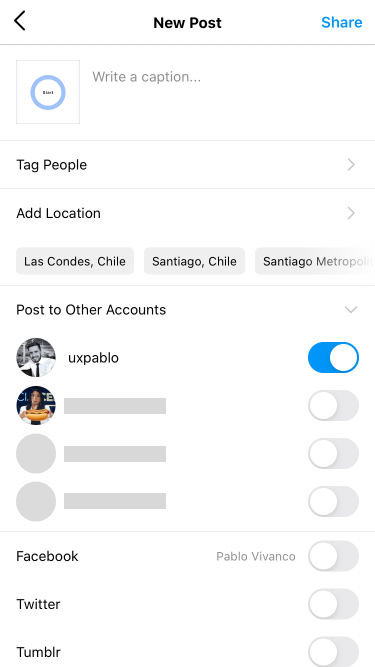

In [10]:
display(Image.open(path1))

### Primera transformación

In [11]:
# Version general
text = pytesseract.image_to_string(Image.open(path1))

# Eligiendo un idioma
text2 = pytesseract.image_to_string(Image.open(path1),lang = 'eng')

In [12]:
text

'< New Post Share\n\n \n\ntion.\n\nTag People\nAdd Location\nLas Condes, Chile Santiago, Chile Santiago Met\n\nPost to Other Accounts\n\nEP verte ©\n®\n\nFacebook Pablo Vivanco\nTwitter\n\nTumblr\n\x0c'

In [13]:
print(text)

< New Post Share

 

tion.

Tag People
Add Location
Las Condes, Chile Santiago, Chile Santiago Met

Post to Other Accounts

EP verte ©
®

Facebook Pablo Vivanco
Twitter

Tumblr



In [14]:
print(text2)

< New Post Share

 

tion.

Tag People
Add Location
Las Condes, Chile Santiago, Chile Santiago Met

Post to Other Accounts

EP verte ©
®

Facebook Pablo Vivanco
Twitter

Tumblr



### Write text to file

In [15]:
text_file = open(main+'/texto.txt','w')
text_file.write(text)
text_file.close()

### Reader function

In [16]:
reader = easyocr.Reader(lang_list = ['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [17]:
output = reader.readtext(path1)

In [18]:
output

[([[153, 15], [225, 15], [225, 31], [153, 31]],
  'New Post',
  0.9995537100954075),
 ([[321, 15], [365, 15], [365, 31], [321, 31]], 'Share', 0.9710700966871305),
 ([[91, 71], [129, 71], [129, 85], [91, 85]], 'Write', 0.8317638674034089),
 ([[141, 71], [205, 71], [205, 87], [141, 87]], 'caption;', 0.768802980330006),
 ([[43, 159], [89, 159], [89, 175], [43, 175]], 'People', 0.6691597946113799),
 ([[17, 207], [103, 207], [103, 221], [17, 221]],
  'Add Location',
  0.6629006862185153),
 ([[23, 255], [93, 255], [93, 269], [23, 269]],
  'Las Condes',
  0.8402480171474886),
 ([[97, 255], [129, 255], [129, 269], [97, 269]], 'Chile', 0.9998819663765471),
 ([[150, 253], [239, 253], [239, 272], [150, 272]],
  'Santiago, Chile',
  0.9208350377189317),
 ([[262, 253], [367, 253], [367, 271], [262, 271]],
  'Santiago Metropo',
  0.7118468098859903),
 ([[17, 302], [169, 302], [169, 320], [17, 320]],
  'Post to Other Accounts',
  0.9080681173443158),
 ([[67, 351], [121, 351], [121, 367], [67, 367]],


In [19]:
s_output = reader.readtext(path1,detail = 0)

In [20]:
s_output

['New Post',
 'Share',
 'Write',
 'caption;',
 'People',
 'Add Location',
 'Las Condes',
 'Chile',
 'Santiago, Chile',
 'Santiago Metropo',
 'Post to Other Accounts',
 'uxpablo',
 'Facebook',
 'Pablo Vivanco',
 'Twitter',
 'Tumblr',
 'Tag']

### Handling Multiple Lines (image or video)

Observar que del arreglo de arreglos ```output```

In [21]:
output[0]

([[153, 15], [225, 15], [225, 31], [153, 31]], 'New Post', 0.9995537100954075)

In [22]:
output[0][0]

[[153, 15], [225, 15], [225, 31], [153, 31]]

In [23]:
output[0][1]

'New Post'

In [24]:
import cv2

In [25]:
img = cv2.imread(path1)

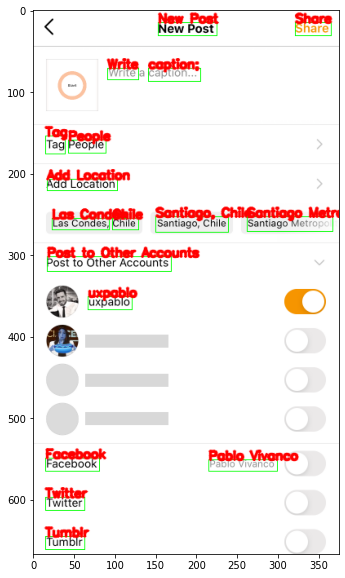

In [26]:
for detection in output: 
    # Toma las coordenadas de la esquina superior izquierda para cada palabra
    top_left = tuple([int(val) for val in detection[0][0]])
    # Mismo para la esquina inferior derecha
    bottom_right = tuple([int(val) for val in detection[0][2]])
    
    text_in_box = detection[1]
    # Especifico el tipo de fuente
    font = cv2.FONT_HERSHEY_SIMPLEX
    # Agregando los rectangulos 
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0))
    # Agregando texto
    img = cv2.putText(img,text_in_box,top_left,font,.5,(255,0,0),2,cv2.LINE_AA)

    
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()